In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc,ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE 
from imblearn.over_sampling import ADASYN  



# Data Collection

In [3]:
df = pd.read_csv("loan.csv") 
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Missing Values Check

In [4]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [5]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]*100/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
loan_amnt,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
emp_title,22927,5.789208
emp_length,18301,4.621115
home_ownership,0,0.000000
annual_inc,0,0.000000


In [6]:
drop_df = df.copy()
drop_df = drop_df.dropna()

In [7]:
nulls_summary_table(drop_df)

,null_count,null_pct
loan_amnt,0,0.0
term,0,0.0
int_rate,0,0.0
installment,0,0.0
grade,0,0.0
sub_grade,0,0.0
emp_title,0,0.0
emp_length,0,0.0
home_ownership,0,0.0
annual_inc,0,0.0


# Exploratory Data Analysis

The goal is to understand the data,look for important variables

In [8]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

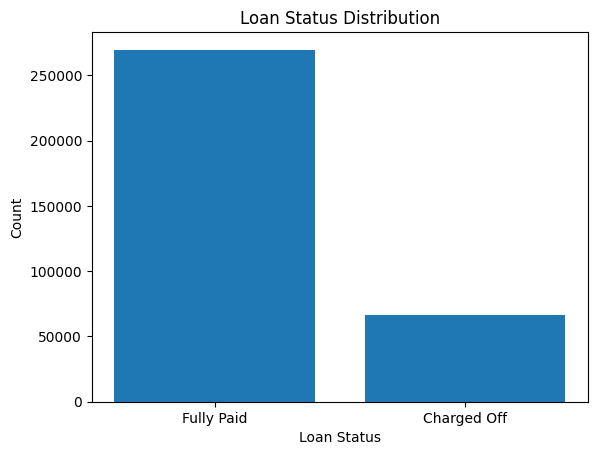

In [10]:
# Count the occurrences of each loan status
status_counts = drop_df['loan_status'].value_counts()

# Create a bar chart
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

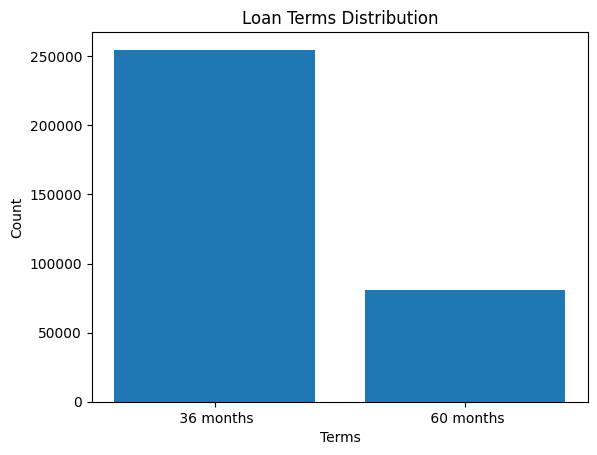

In [11]:
term_counts = drop_df['term'].value_counts()

# Create a bar chart
plt.bar(term_counts.index, term_counts.values)
plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Loan Terms Distribution')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x16e5a1490>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x16e5a1460>,
 'cmins': <matplotlib.collections.LineCollection at 0x16e5a1b80>,
 'cbars': <matplotlib.collections.LineCollection at 0x16e568d60>}

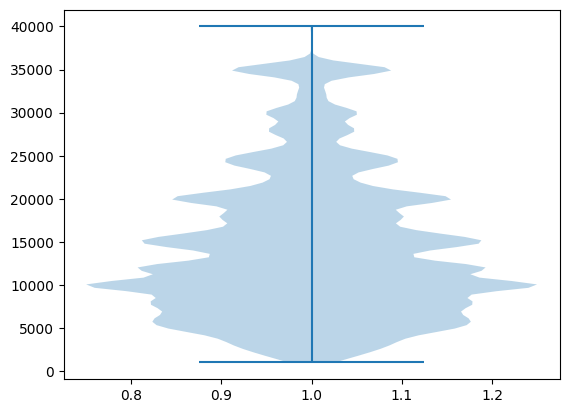

In [12]:
plt.violinplot(drop_df['loan_amnt'])

<Axes: ylabel='loan_amnt'>

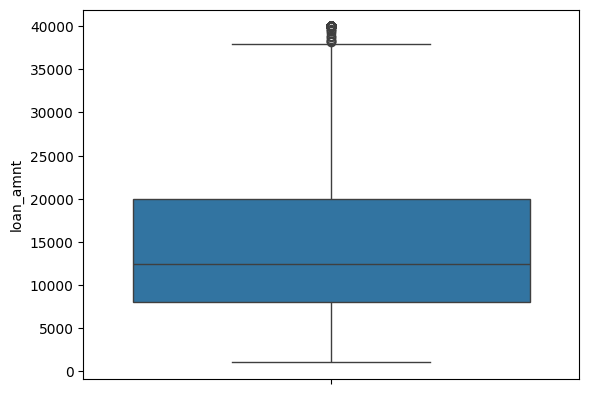

In [13]:
sns.boxplot(drop_df['loan_amnt'])

<Axes: >

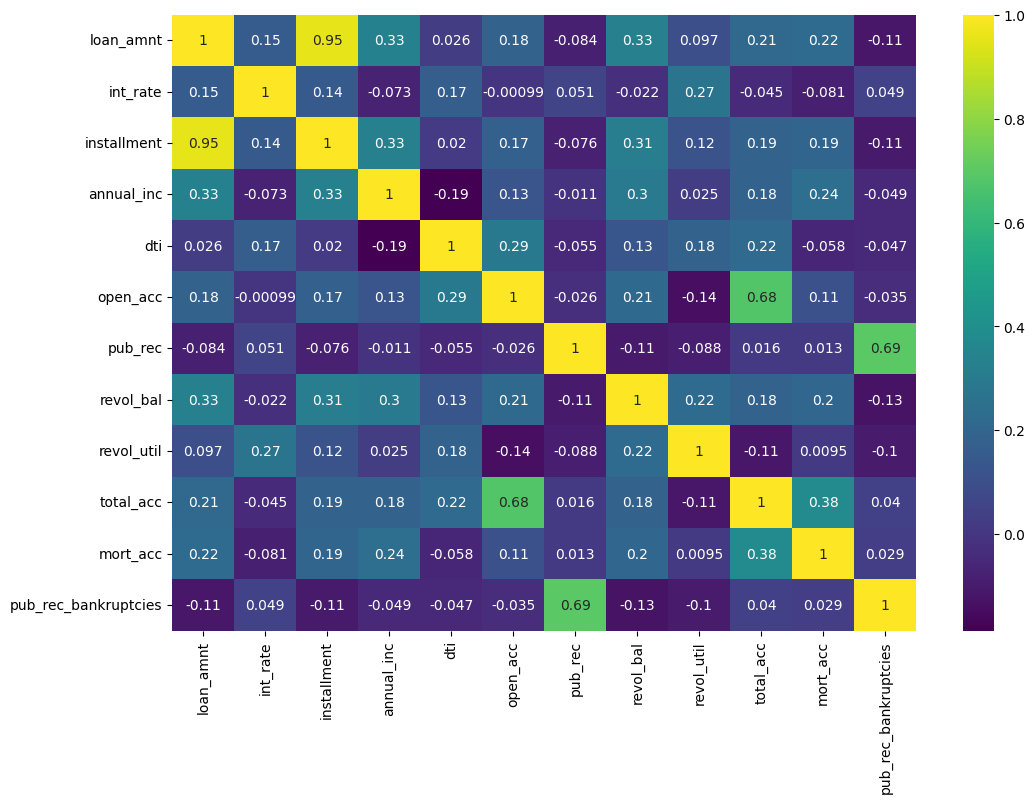

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(drop_df.corr(numeric_only=True), annot=True, cmap='viridis')

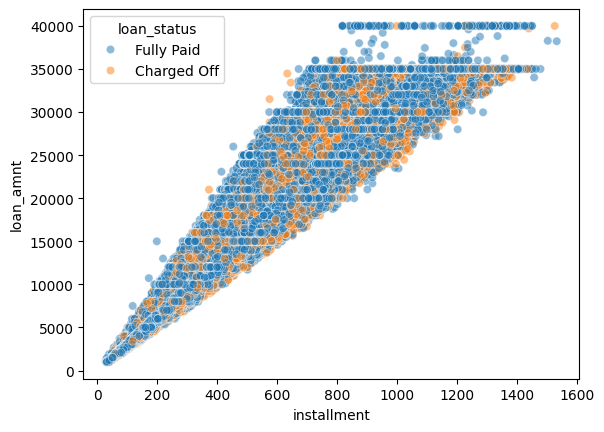

In [15]:
sns.scatterplot(x = drop_df['installment'], y = drop_df['loan_amnt'], hue=drop_df['loan_status'], alpha=0.5)
plt.show()

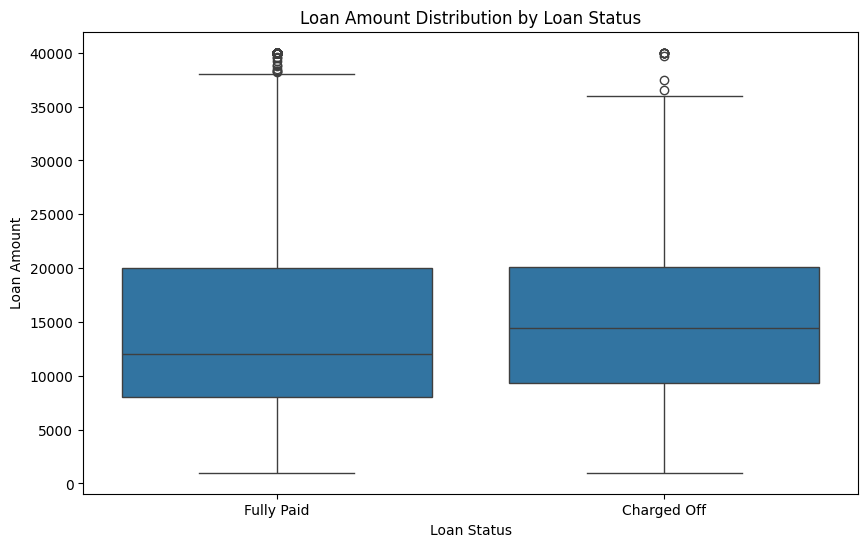

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=drop_df)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

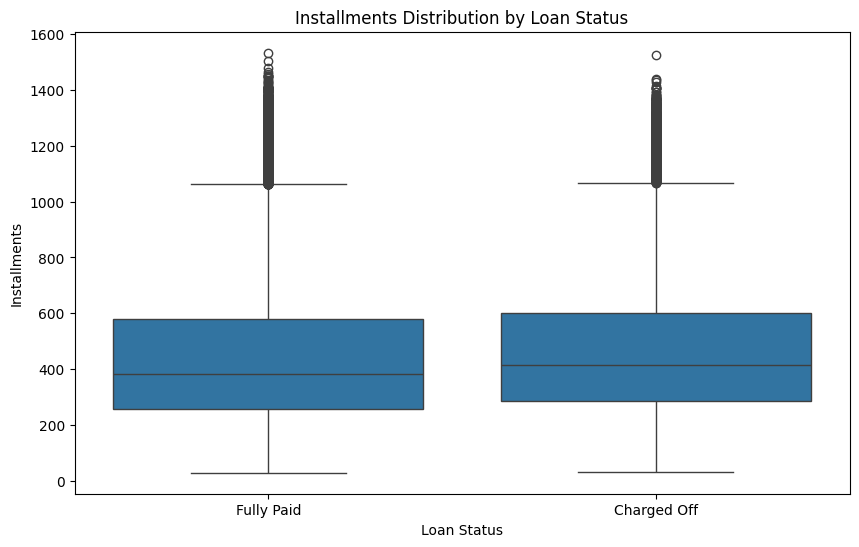

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='installment', data=drop_df)
plt.title('Installments Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Installments')
plt.show()

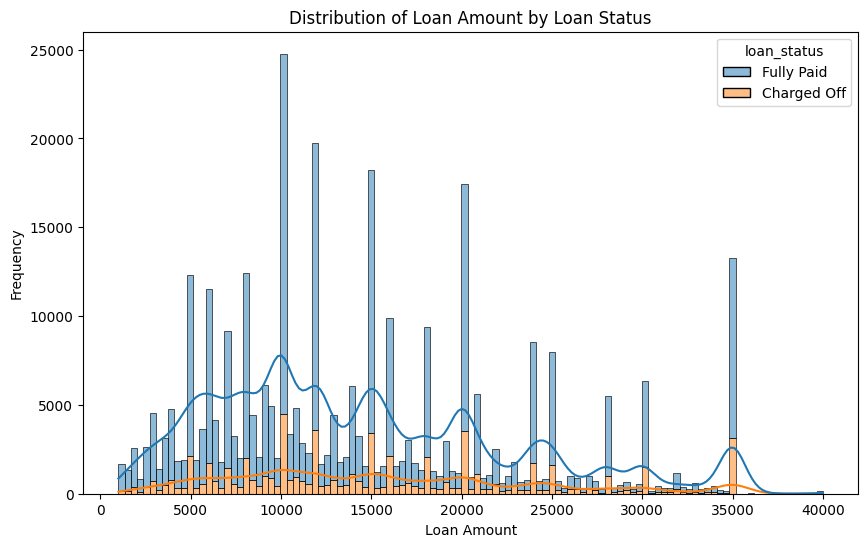

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=drop_df, x='loan_amnt', hue='loan_status', kde=True, multiple='stack')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount by Loan Status')
plt.show()


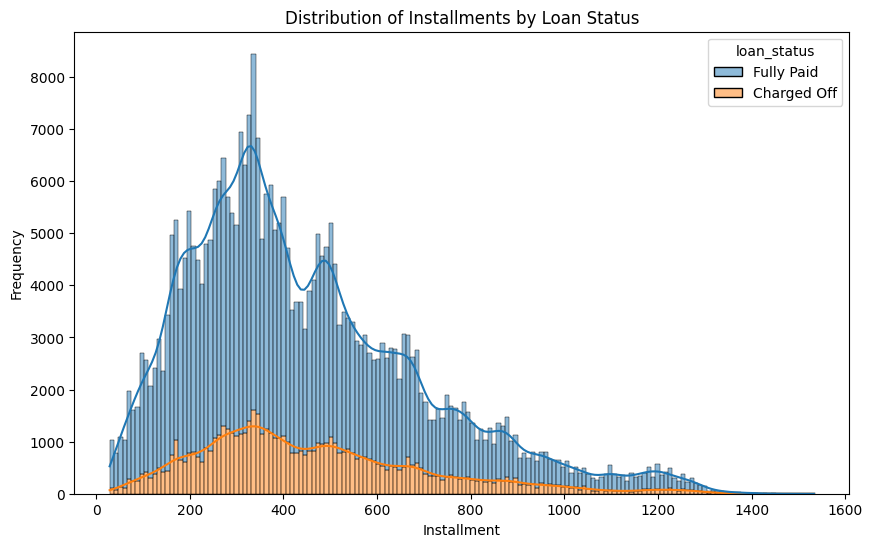

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=drop_df, x='installment', hue='loan_status', kde=True, multiple='stack')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.title('Distribution of Installments by Loan Status')
plt.show()

In [20]:
drop_df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,66312.0,15577.620943,8480.056046,1000.0,9375.0,14400.0,20125.0,40000.0
Fully Paid,269555.0,14263.263527,8343.049652,1000.0,8000.0,12000.0,20000.0,40000.0


**grade & sub_grade**
* grade: LC assigned loan grade
* sub_grade: LC assigned loan subgrade
Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

What are the unique possible grade & sub_grade?

/var/folders/1j/md6q1899197dvw86253j_bfw0000gn/T/ipykernel_39428/2101540315.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


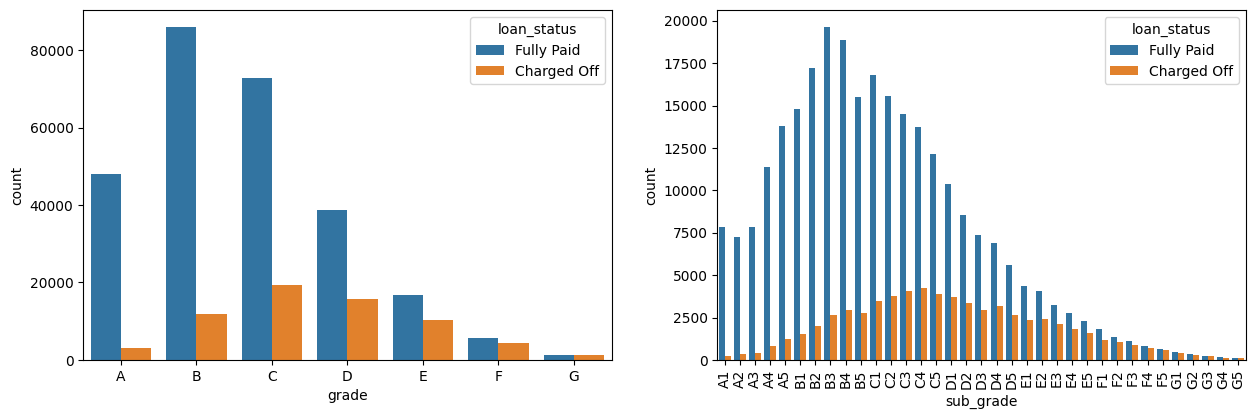

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(drop_df.grade.unique().tolist())
sns.countplot(x='grade', data=drop_df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(drop_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=drop_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## **term, home_ownership, verification_status & purpose**
* term: The number of payments on the loan. Values are in months and can be either 36 or 60.
* home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
* verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
* purpose: A category provided by the borrower for the loan request.

In [22]:
drop_df['home_ownership'].value_counts()

home_ownership
MORTGAGE    170831
RENT        133932
OWN          31045
OTHER           30
NONE            28
ANY              1
Name: count, dtype: int64

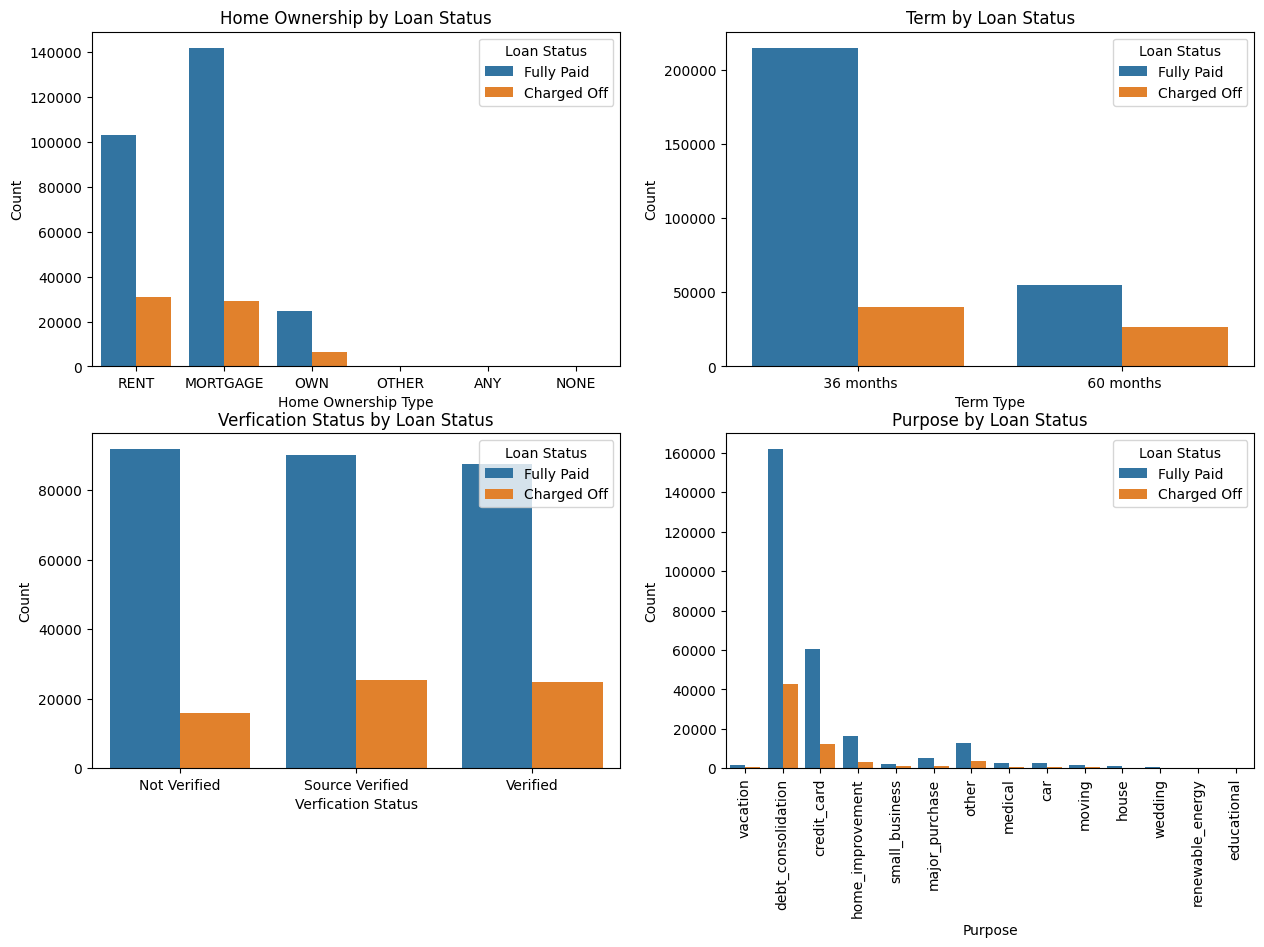

In [23]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(data=drop_df, x='home_ownership', hue='loan_status')
plt.title('Home Ownership by Loan Status')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 2)
sns.countplot(data=drop_df, x='term', hue='loan_status')
plt.title('Term by Loan Status')
plt.xlabel('Term Type')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 3)
sns.countplot(data=drop_df, x='verification_status', hue='loan_status')
plt.title('Verfication Status by Loan Status')
plt.xlabel('Verfication Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 4)
sns.countplot(data=drop_df, x='purpose', hue='loan_status')
plt.title('Purpose by Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.legend(title='Loan Status')


In [24]:
drop_df.loc[drop_df['home_ownership']=='OTHER', 'loan_status'].value_counts()


loan_status
Fully Paid     23
Charged Off     7
Name: count, dtype: int64

## **int_rate & annual_inc**
* int_rate: Interest Rate on the loan
* annual_inc: The self-reported annual income provided by the borrower during registration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


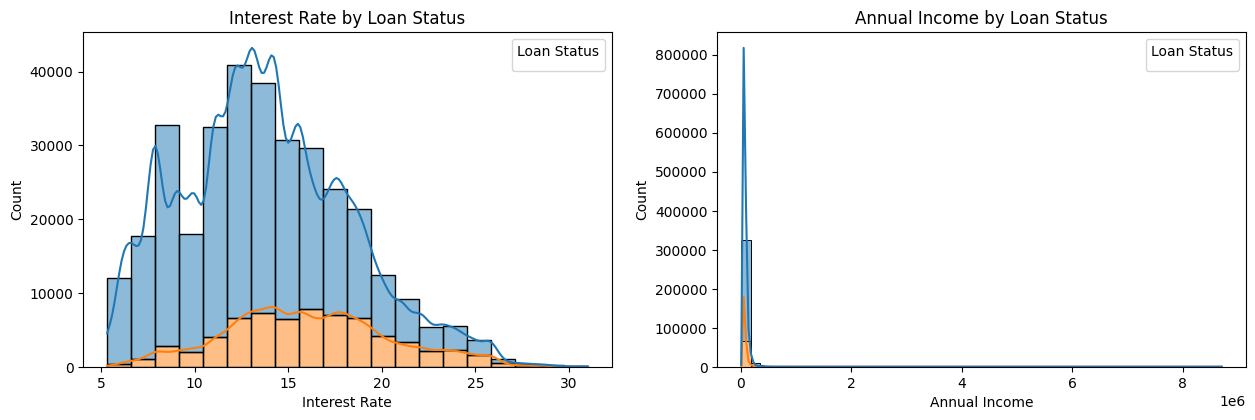

In [25]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(data=drop_df, x='int_rate', hue='loan_status', bins =20, multiple="stack", kde=True)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 2)
sns.histplot(data=drop_df, x='annual_inc', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Annual Income by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.legend(title='Loan Status')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


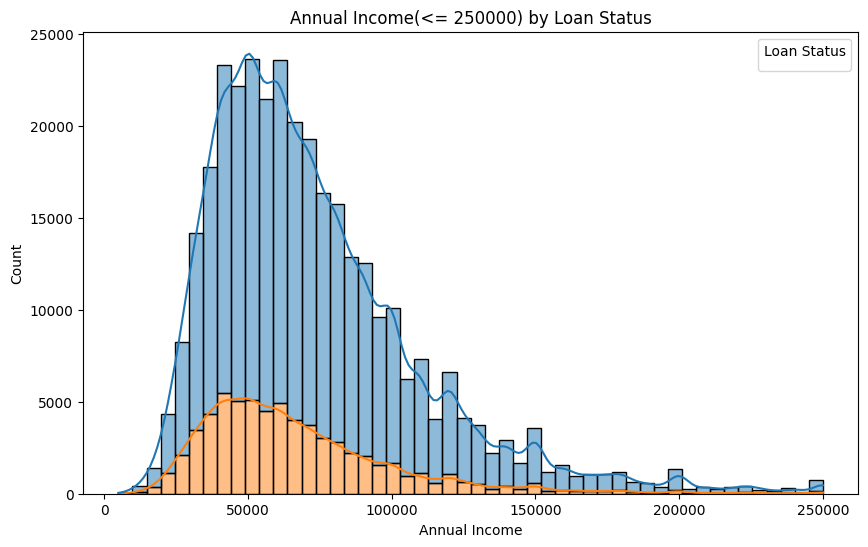

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=drop_df[drop_df['annual_inc']<= 250000], x='annual_inc', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Annual Income(<= 250000) by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.legend(title='Loan Status')

In [27]:
print((drop_df[drop_df.annual_inc >= 250000].shape[0] / drop_df.shape[0]) * 100)
print((drop_df[drop_df.annual_inc >= 1000000].shape[0] / drop_df.shape[0]) * 100)

1.0533931586014702
0.018161951010370176


* **only 1.05% borrowers have annual income greater than 250000 and only 0.018% people have annual income greater than 1000000.** 

In [28]:
drop_df.loc[drop_df.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     53
Charged Off     8
Name: count, dtype: int64

In [29]:
drop_df.loc[drop_df.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3049
Charged Off     489
Name: count, dtype: int64

* Loans with giher interest rates are more likely to be unpaid.
* Only 61 borrowers have annual income greater than 1 Million and 3538 borrowers have annual income greater than 250K

## emp_title & emp_length
* emp_title: The job title supplied by the Borrower when applying for the loan.
* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [30]:
drop_df['emp_title'].value_counts()[:20]

emp_title
Teacher                     4367
Manager                     4231
Registered Nurse            1841
RN                          1840
Supervisor                  1812
Sales                       1618
Project Manager             1494
Owner                       1381
Driver                      1317
Office Manager              1213
manager                     1141
Director                    1085
General Manager             1068
Engineer                     987
teacher                      954
driver                       876
Vice President               847
Operations Manager           762
Administrative Assistant     750
Accountant                   744
Name: count, dtype: int64

/var/folders/1j/md6q1899197dvw86253j_bfw0000gn/T/ipykernel_39428/1233061056.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


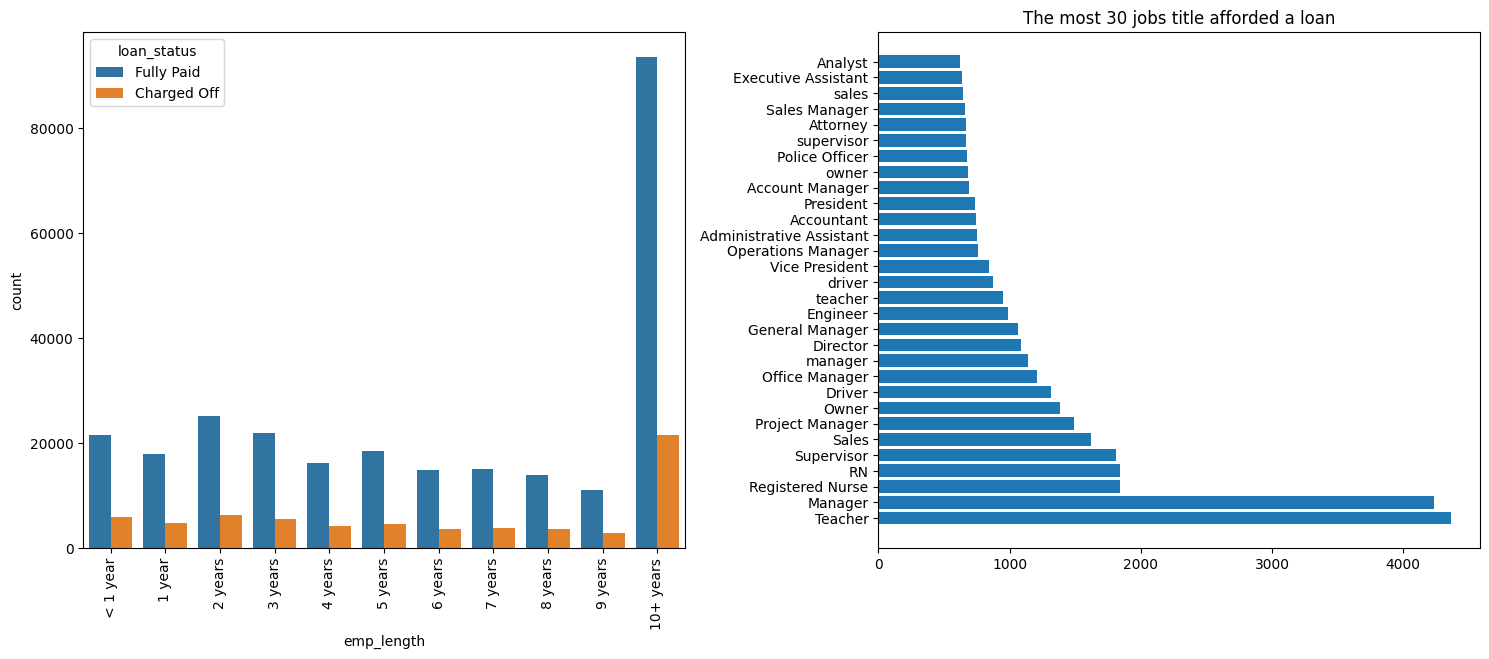

In [31]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=drop_df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(drop_df.emp_title.value_counts()[:30].index, drop_df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

## title
* title: The loan title provided by the borrower

In [32]:
drop_df.title.value_counts()[:10]

title
Debt consolidation         144270
Credit card refinancing     48438
Home improvement            14154
Other                       11951
Debt Consolidation           8986
Major purchase               4466
Consolidation                3201
debt consolidation           2800
Business                     2615
Medical expenses             2503
Name: count, dtype: int64

We will remove title column as we already have a purpose column.

## dti, open_acc, revol_bal, revol_util, & total_acc
* dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* open_acc: The number of open credit lines in the borrower's credit file.
* revol_bal: Total credit revolving balance
* revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc: The total number of credit lines currently in the borrower's credit file

In [33]:
drop_df['closed_credit_line'] = drop_df.apply(lambda row: 0 if row['total_acc'] - row['open_acc'] == 0 else 1, axis=1)


In [34]:
drop_df['closed_credit_line'].value_counts()

closed_credit_line
1    332345
0      3522
Name: count, dtype: int64

This means that 332345 borrowers have a atleast 1 credit line closed which says that there is a high chance of them not defaulting a loan as they have previous experience managing multiple credit lines and closing them by paying off the loan.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


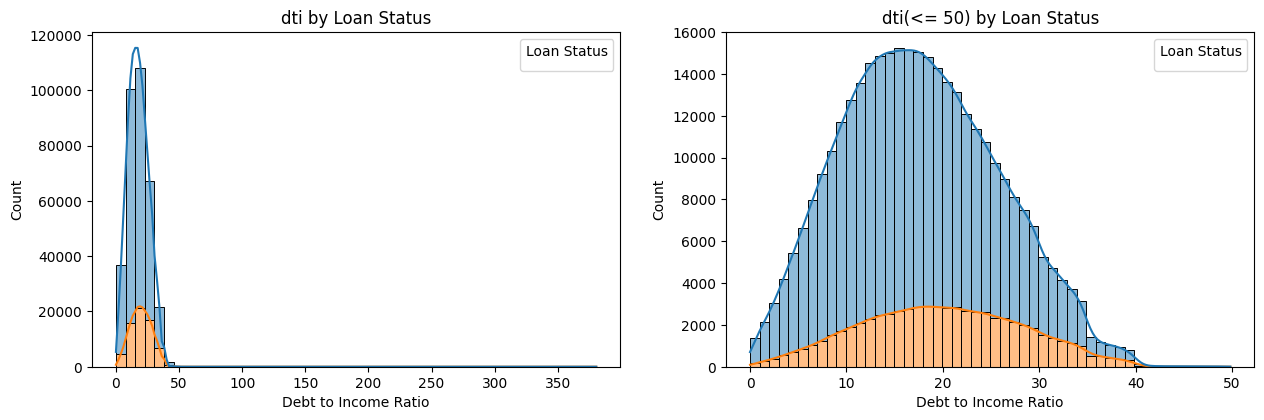

In [35]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(data=drop_df, x='dti', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('dti by Loan Status')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 2)
sns.histplot(data=drop_df[drop_df['dti']<= 50], x='dti', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('dti(<= 50) by Loan Status')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.legend(title='Loan Status')

In [36]:
drop_df.loc[drop_df['dti']>=50, 'loan_status'].value_counts()

loan_status
Fully Paid     15
Charged Off     5
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


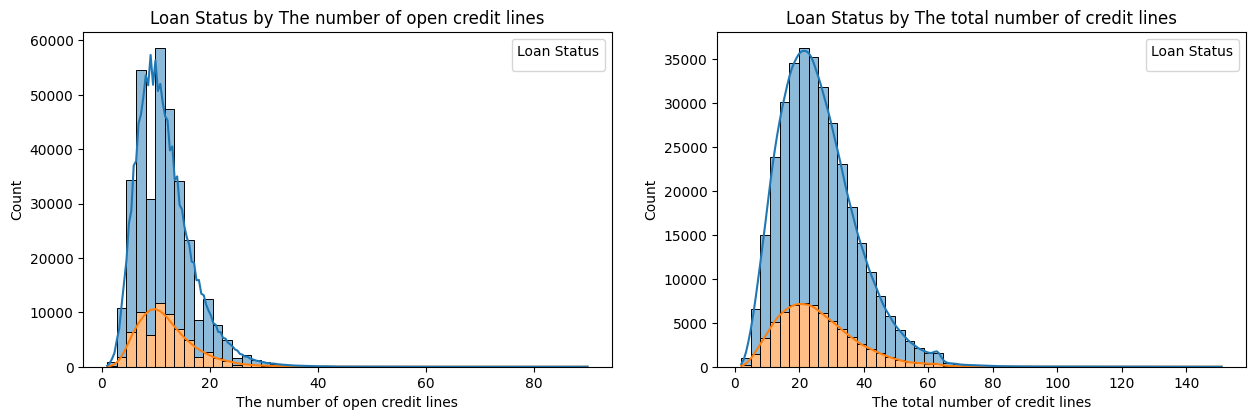

In [37]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(data=drop_df, x='open_acc', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Loan Status by The number of open credit lines')
plt.xlabel('The number of open credit lines')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 2)
sns.histplot(data=drop_df, x='total_acc', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Loan Status by The total number of credit lines')
plt.xlabel('The total number of credit lines')
plt.ylabel('Count')
plt.legend(title='Loan Status')

In [38]:
print(drop_df.shape)
print(drop_df[drop_df.open_acc > 40].shape)

(335867, 28)
(208, 28)


In [39]:
print(drop_df.shape)
print(drop_df[drop_df.total_acc > 80].shape)

(335867, 28)
(253, 28)


In [40]:
print(drop_df.shape)
print(drop_df[drop_df.revol_util > 120].shape)

(335867, 28)
(25, 28)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


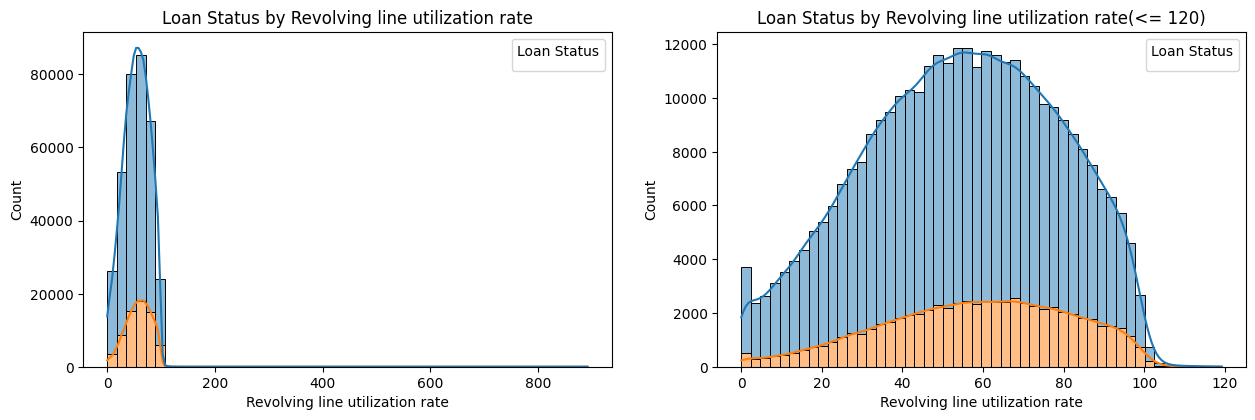

In [41]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(data=drop_df, x='revol_util', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Loan Status by Revolving line utilization rate')
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 2)
sns.histplot(data=drop_df[drop_df['revol_util']<=120], x='revol_util', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Loan Status by Revolving line utilization rate(<= 120)')
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Count')
plt.legend(title='Loan Status')

In [42]:
drop_df[drop_df['revol_util'] > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,closed_credit_line
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,...,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813",1


In [43]:
print(drop_df.shape)
print(drop_df[drop_df.revol_bal > 250000].shape)

(335867, 28)
(370, 28)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


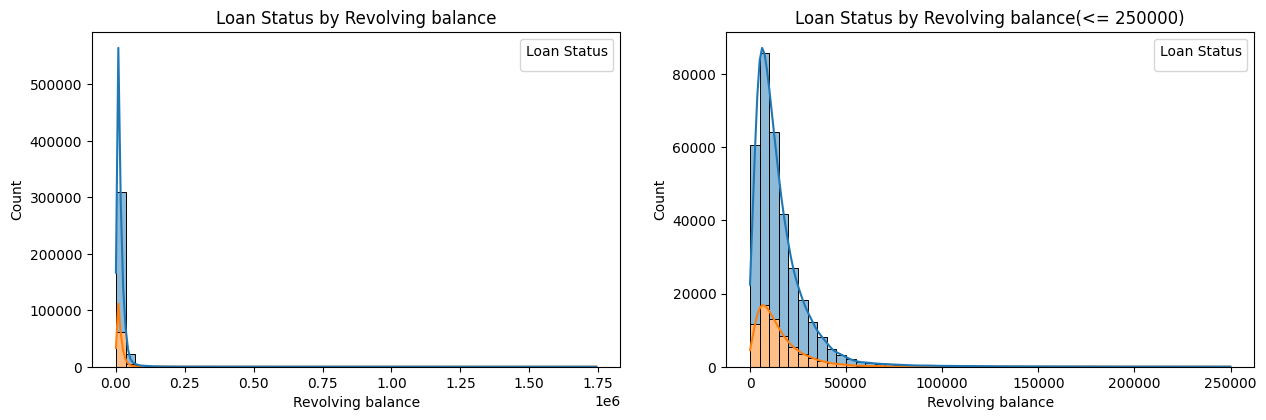

In [44]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(data=drop_df, x='revol_bal', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Loan Status by Revolving balance')
plt.xlabel('Revolving balance')
plt.ylabel('Count')
plt.legend(title='Loan Status')


plt.subplot(4, 2, 2)
sns.histplot(data=drop_df[drop_df['revol_bal'] <= 250000], x='revol_bal', hue='loan_status', bins =50, multiple="stack", kde=True)
plt.title('Loan Status by Revolving balance(<= 250000)')
plt.xlabel('Revolving balance')
plt.ylabel('Count')
plt.legend(title='Loan Status')

In [45]:
drop_df.loc[drop_df.revol_bal > 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     329
Charged Off     41
Name: count, dtype: int64

* It seems that the smaller the dti the more likely that the loan will not be paid.
* Only 217 borrower have more than 40 open credit lines.
* Only 266 borrower have more than 80 credit line in the borrower credit file.

## Correlation between Loan Status and Numerical features

In [46]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_features)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [47]:
drop_df['loan_status'] = drop_df.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [48]:
# Calculate Point-Biserial correlation for each numerical feature
for col in numerical_features:
    correlation, p_value = pointbiserialr(drop_df[col], drop_df['loan_status'])
    print(f"{col}: correlation = {correlation}, p-value = {p_value}")

loan_amnt: correlation = -0.06238506112074081, p-value = 8.816563236385096e-287
int_rate: correlation = -0.2506817193069108, p-value = 0.0
installment: correlation = -0.04197204569823632, p-value = 8.331775616541038e-131
annual_inc: correlation = 0.052946470297030854, p-value = 4.7275652939496905e-207
dti: correlation = -0.13284024386953572, p-value = 0.0
open_acc: correlation = -0.02985457372939519, p-value = 4.2590541743127504e-67
pub_rec: correlation = -0.013793254811616437, p-value = 1.3052589561471767e-15
revol_bal: correlation = 0.012009211756824253, p-value = 3.4015764085859608e-12
revol_util: correlation = -0.07749940787807134, p-value = 0.0
total_acc: correlation = 0.018629524987074656, p-value = 3.538652401764331e-27
mort_acc: correlation = 0.072490909086431, p-value = 0.0
pub_rec_bankruptcies: correlation = -0.0026485087690225097, p-value = 0.12480479724020711


* Strongest Predictors: int_rate (interest rate) and dti (debt-to-income ratio) have the highest correlation with loan default and are statistically significant. They may play important roles in any predictive model.
* Weak or Negligible Predictors: Features like revol_bal, total_acc, and pub_rec_bankruptcies show little to no correlation with default, suggesting they may not be valuable in predicting default risk.

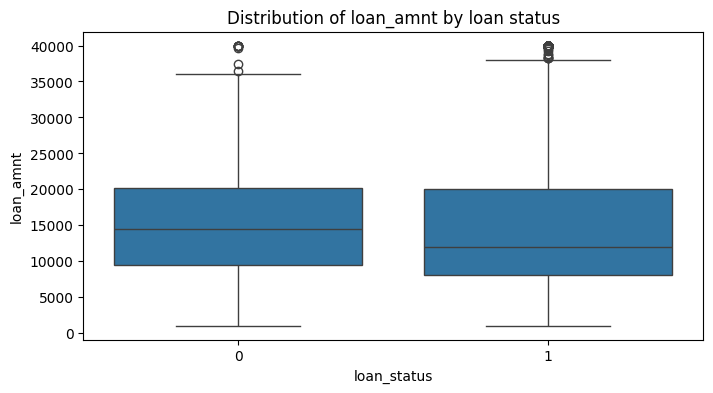

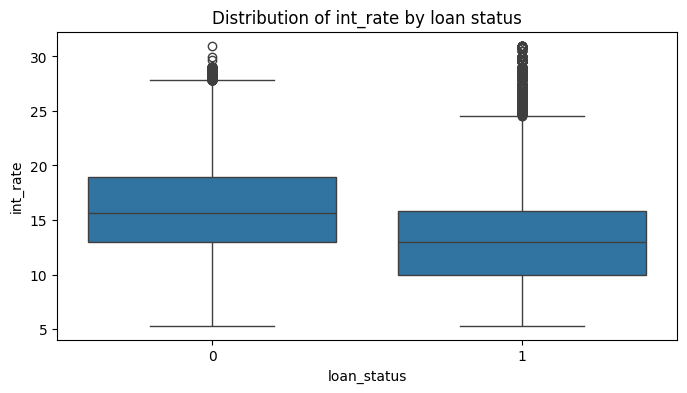

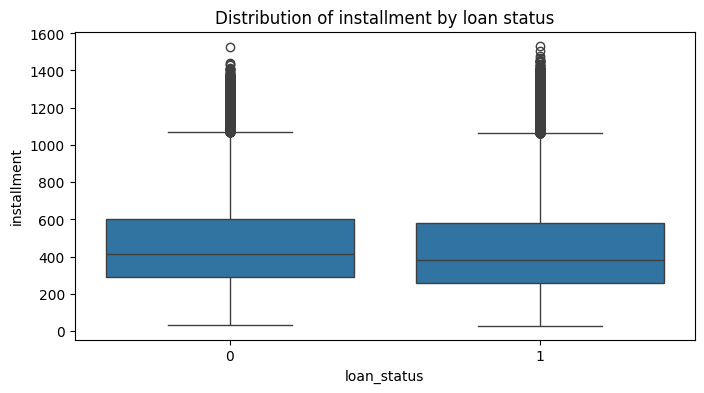

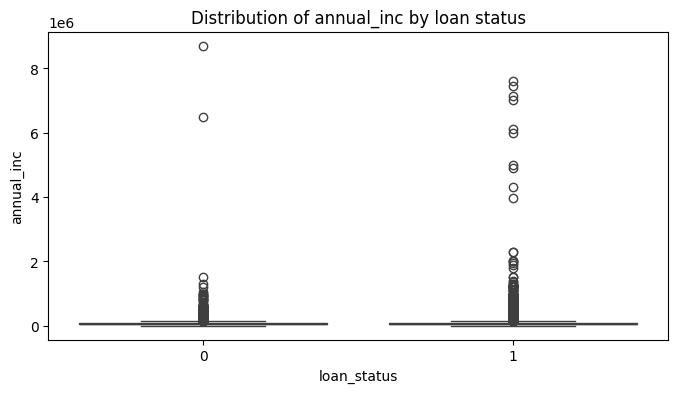

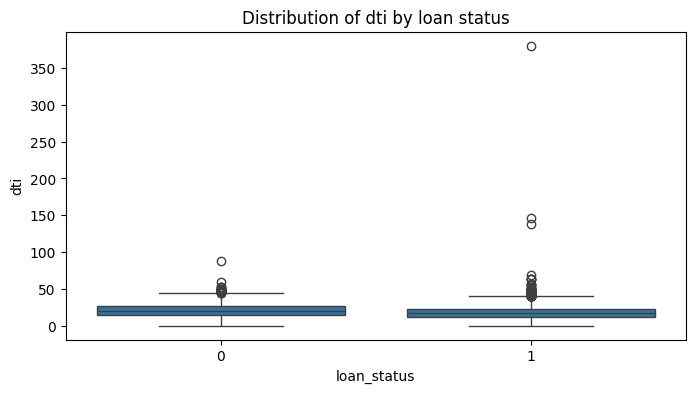

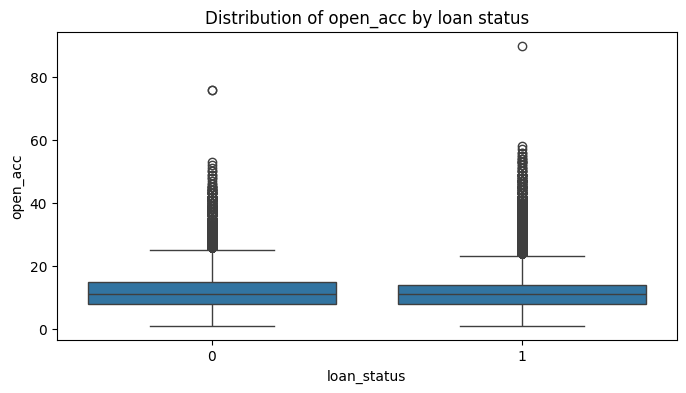

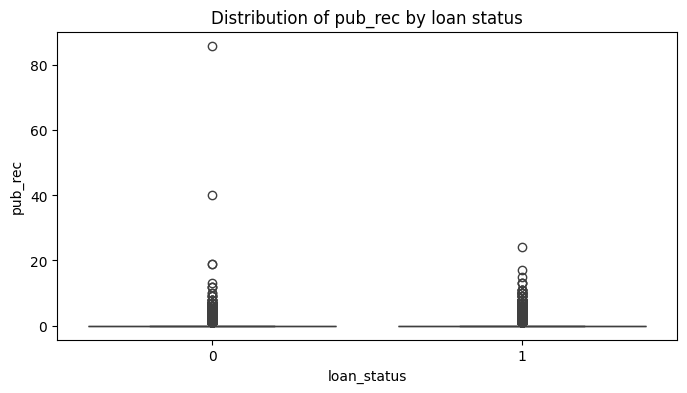

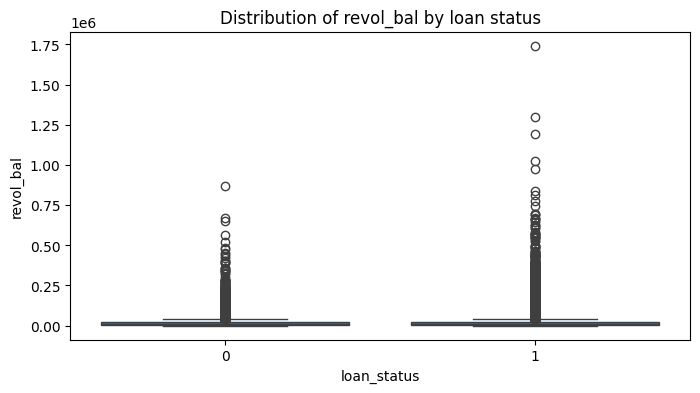

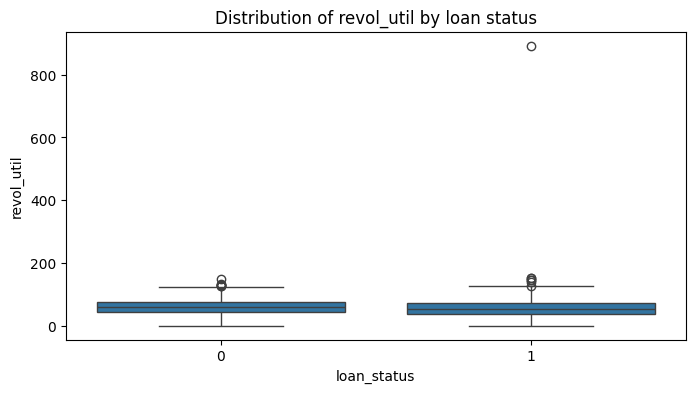

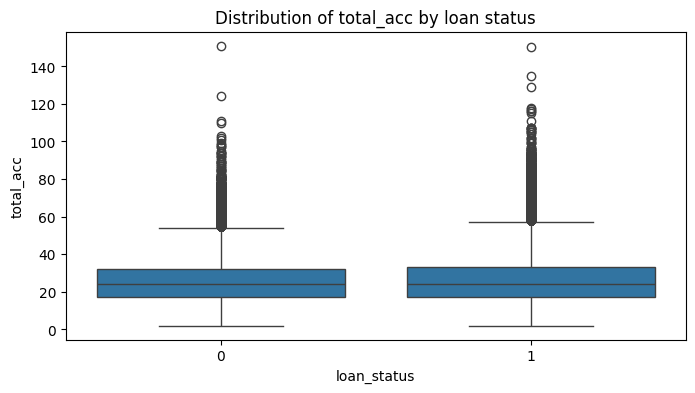

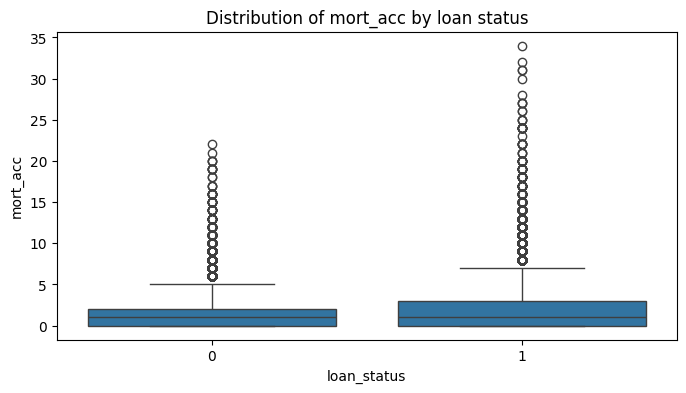

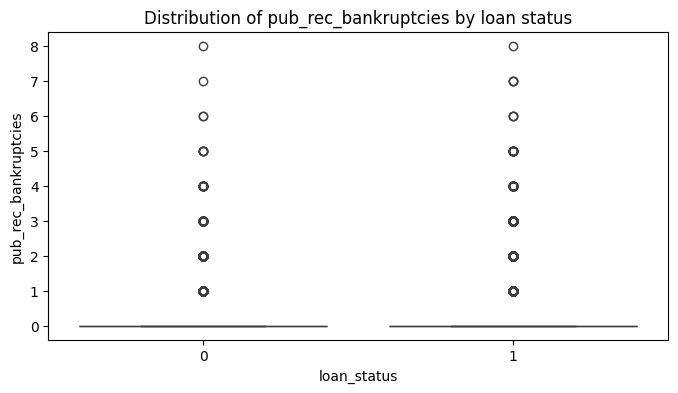

In [49]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='loan_status', y=col, data=drop_df)
    plt.title(f'Distribution of {col} by loan status')
    plt.show()

# Data PreProcessing
**Objectives** -
* Convert categorical features into dummy variables.
* Detect outliers and remove them or winsorize them.
* Remove unnecessary or repetitive features.

In [50]:
print(f"The Length of the data: {drop_df.shape}")

The Length of the data: (335867, 28)


In [51]:
drop_df.emp_title.nunique()

150832

* There are too many titles so we can't create dummies for these values so we'll have to drop this column.

In [52]:
drop_df.drop('emp_title', axis=1, inplace=True)

In [53]:
drop_df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [54]:
for year in drop_df.emp_length.unique():
    print(f"{year} in this position:")
    print(f"{drop_df[drop_df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years in this position:
loan_status
1    0.813505
0    0.186495
Name: proportion, dtype: float64
4 years in this position:
loan_status
1    0.800098
0    0.199902
Name: proportion, dtype: float64
< 1 year in this position:
loan_status
1    0.784623
0    0.215377
Name: proportion, dtype: float64
6 years in this position:
loan_status
1    0.804927
0    0.195073
Name: proportion, dtype: float64
9 years in this position:
loan_status
1    0.793352
0    0.206648
Name: proportion, dtype: float64
2 years in this position:
loan_status
1    0.798968
0    0.201032
Name: proportion, dtype: float64
3 years in this position:
loan_status
1    0.797326
0    0.202674
Name: proportion, dtype: float64
8 years in this position:
loan_status
1    0.796914
0    0.203086
Name: proportion, dtype: float64
7 years in this position:
loan_status
1    0.80211
0    0.19789
Name: proportion, dtype: float64
5 years in this position:
loan_status
1    0.800383
0    0.199617
Name: proportion, dtype: float64
1 year in

Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [55]:
drop_df.drop('emp_length', axis=1, inplace=True)

In [56]:
drop_df.title.value_counts().head()

title
Debt consolidation         144270
Credit card refinancing     48438
Home improvement            14154
Other                       11951
Debt Consolidation           8986
Name: count, dtype: int64

In [57]:
drop_df.purpose.value_counts().head()

purpose
debt_consolidation    204310
credit_card            72648
home_improvement       19637
other                  16193
major_purchase          6367
Name: count, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [58]:
drop_df.drop('title', axis=1, inplace=True)

In [59]:
drop_df.mort_acc.value_counts()

mort_acc
0.0     131468
1.0      57020
2.0      46877
3.0      35440
4.0      25945
5.0      16941
6.0      10250
7.0       5587
8.0       2903
9.0       1542
10.0       796
11.0       438
12.0       241
13.0       130
14.0       101
15.0        58
16.0        32
17.0        20
18.0        17
19.0        14
20.0        12
24.0         9
22.0         7
21.0         4
25.0         3
27.0         3
31.0         2
26.0         2
23.0         1
34.0         1
30.0         1
28.0         1
32.0         1
Name: count, dtype: int64

In [60]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [61]:
drop_df['pub_rec'] = drop_df.pub_rec.apply(pub_rec)
drop_df['mort_acc'] = drop_df.mort_acc.apply(mort_acc)
drop_df['pub_rec_bankruptcies'] = drop_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [62]:
drop_df.mort_acc.value_counts()

mort_acc
1    204399
0    131468
Name: count, dtype: int64

In [63]:
drop_df['pub_rec'].value_counts()

pub_rec
0    285196
1     50671
Name: count, dtype: int64

In [64]:
drop_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0    296470
1     39397
Name: count, dtype: int64

In [65]:
drop_df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
closed_credit_line      0
dtype: int64

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

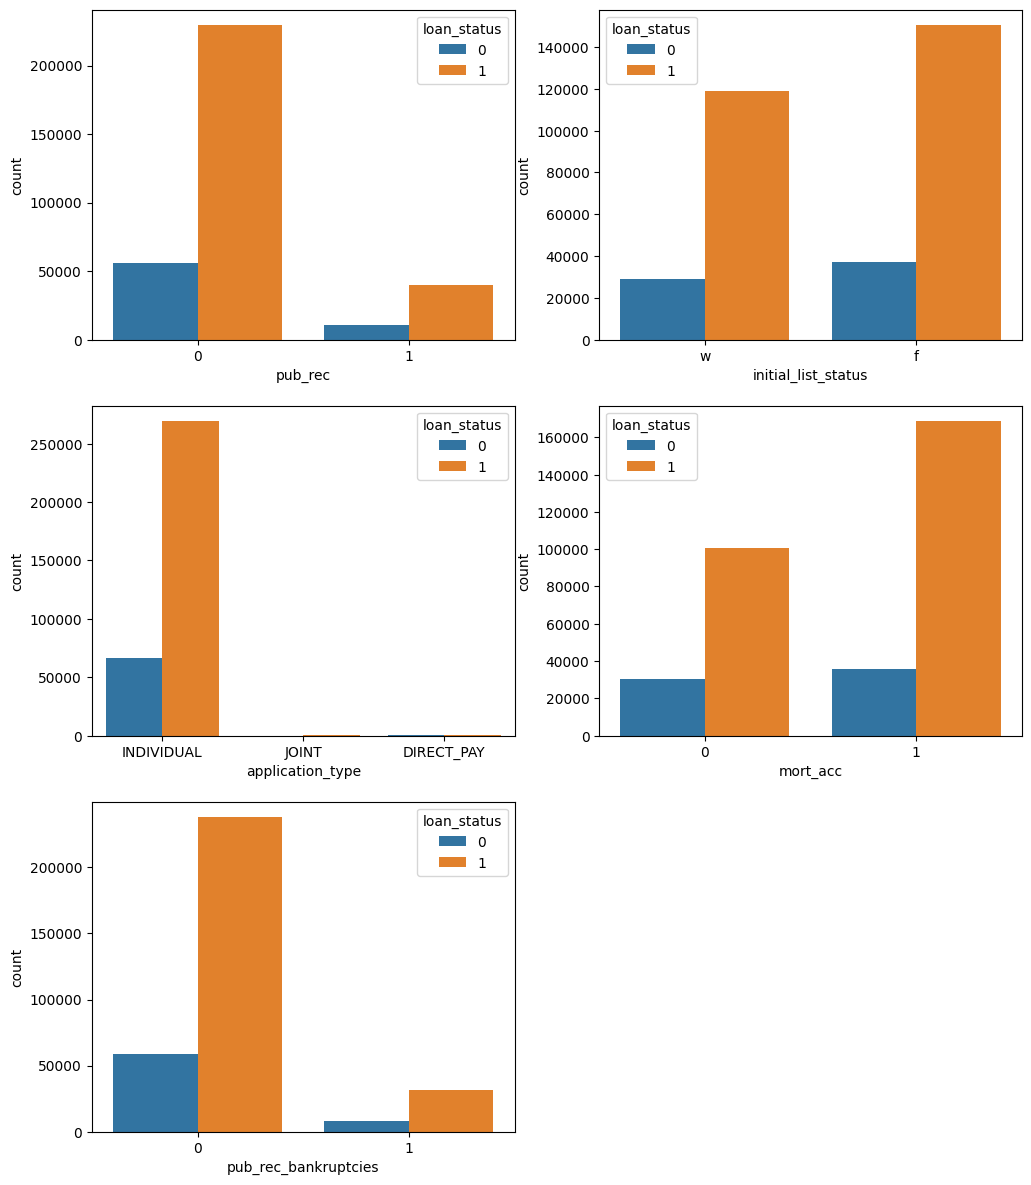

In [66]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=drop_df, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=drop_df, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=drop_df, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=drop_df, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=drop_df, hue='loan_status')

In [67]:
drop_df.dropna(inplace=True)

In [68]:
drop_df.shape

(335867, 25)

## Categorical Variables

In [69]:
print([column for column in drop_df.columns if drop_df[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [70]:
drop_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [71]:
term_values = {' 36 months': 36, ' 60 months': 60}
drop_df['term'] = drop_df.term.map(term_values)

In [72]:
drop_df.term.unique()

array([36, 60])

In [73]:
drop_df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [74]:
drop_df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

In [75]:
drop_df.drop('grade', axis=1, inplace=True)

In [76]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
final_df = pd.get_dummies(drop_df, columns=dummies, drop_first=True)

In [77]:
final_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,1,26.24,Jun-1990,16.0,...,True,False,True,True,False,False,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,1,22.05,Jul-2004,17.0,...,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,1,12.79,Aug-2007,13.0,...,False,False,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,1,2.60,Sep-2006,6.0,...,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,0,33.95,Mar-1999,13.0,...,False,False,False,True,False,True,False,False,False,False


**Address**
* We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [78]:
final_df.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [79]:
final_df['zip_code'] = final_df.address.apply(lambda x: x[-5:])

In [80]:
final_df.zip_code.head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [81]:
final_df.zip_code.value_counts()

zip_code
70466    48333
30723    48016
22690    47844
48052    47459
00813    38792
29597    38516
05113    38412
93700     9553
11650     9549
86630     9393
Name: count, dtype: int64

In [82]:
final_df = pd.get_dummies(final_df, columns=['zip_code'], drop_first=True)

In [83]:
final_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,1,26.24,Jun-1990,16.0,...,True,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,1,22.05,Jul-2004,17.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,1,12.79,Aug-2007,13.0,...,True,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,1,2.60,Sep-2006,6.0,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,0,33.95,Mar-1999,13.0,...,False,False,True,False,False,False,False,False,False,False


In [84]:
final_df.drop('address', axis=1, inplace=True)

**issue_d**
* This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [85]:
final_df.drop('issue_d', axis=1, inplace=True)

In [86]:
# Convert 'earliest_cr_line' to datetime format
final_df['earliest_cr_line'] = pd.to_datetime(final_df['earliest_cr_line'], errors='coerce')

# Extract the year from 'earliest_cr_line'
final_df['earliest_cr_line'] = final_df['earliest_cr_line'].dt.year

/var/folders/1j/md6q1899197dvw86253j_bfw0000gn/T/ipykernel_39428/681434314.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['earliest_cr_line'] = pd.to_datetime(final_df['earliest_cr_line'], errors='coerce')


In [87]:
final_df.earliest_cr_line.value_counts()

earliest_cr_line
2001    25345
2000    24884
2002    22946
1999    22378
2003    20926
        ...  
1944        1
1953        1
1954        1
1951        1
1948        1
Name: count, Length: 65, dtype: int64

## Train Test Split

In [88]:
w_p = final_df.loan_status.value_counts()[0] / final_df.shape[0]
w_n = final_df.loan_status.value_counts()[1] / final_df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.1974352943278143
Weight of negative values 0.8025647056721857


As we can see there's a clear data imbalance and we'll have to address this issue to train our model by using techniques like SMOTE.

In [89]:
train, test = train_test_split(final_df, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(225030, 82)
(110837, 82)


# Removing Outliers

In [90]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(225016, 82)
(225030, 82)


In [91]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(225030, 82)
(222667, 82)


## Normalizing the Data

In [92]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [93]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723       bool
zip_code_48052       bool
zip_code_70466       bool
zip_code_86630       bool
zip_code_93700       bool
Length: 81, dtype: object

In [94]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
y_train.head()

22191     1
358276    1
229546    1
115075    1
352950    0
Name: loan_status, dtype: int64

# Handling data Imbalance

In [96]:
w_p_train = y_train.value_counts()[0] / y_train.shape[0]
w_n_train = y_train.value_counts()[1] / y_train.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.1974352943278143
Weight of negative values 0.8025647056721857


We can clearly see that there's a huge imbalance between our classes and we need to address it so that our model is trained on sufficient data for good predictions.

## Synthetic Minority Oversampling (SMOTE)
Synthetic Minority Oversampling (SMOTE) is an oversampling technique that creates synthetic data points. SMOTE address’ the core problem in oversampling. Oversampling creates duplicate datapoints whereas SMOTE slightly alters these data points.

In [97]:
smote = SMOTE(random_state = 42) 
X_smote, y_smote = smote.fit_resample(X_train,y_train)

<Axes: xlabel='loan_status'>

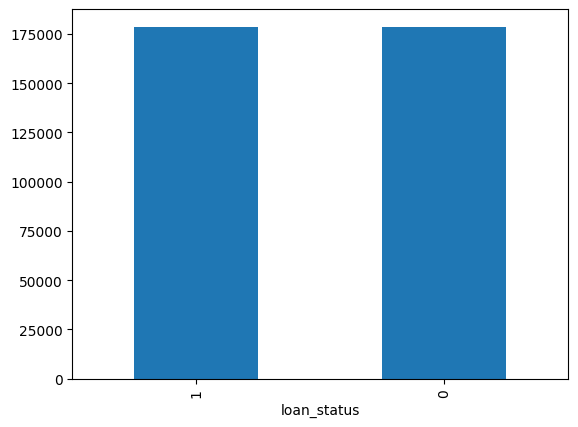

In [98]:
y_smote.value_counts().plot.bar()

## Borderline Smote
The idea behind borderline SMOTE is that we only want to use data that’s at risk of being misclassified as the data to be oversampled. In this case, we build a classifier to classify points as positive or negative. Then, for the data points we misclassify, we oversample those data points. This would hopefully train our algorithm to better recognize these difficult instances and correct for them.

In [99]:
bsmote = BorderlineSMOTE(random_state = 42) 

X_bsmote, y_bsmote = bsmote.fit_resample(X_train,y_train)

<Axes: xlabel='loan_status'>

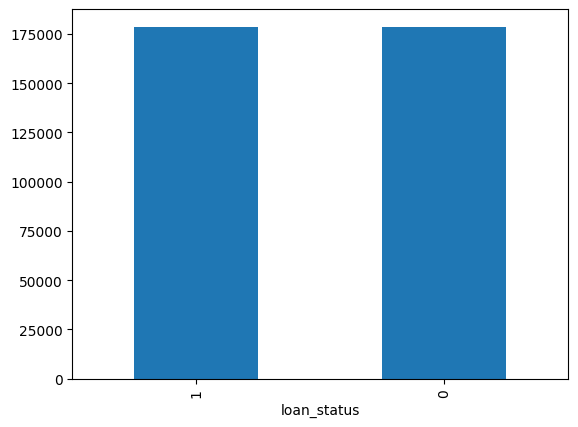

In [100]:
y_bsmote.value_counts().plot.bar()

## Adaptive Synthetic Oversampling (ADASYN)
The idea behind AdaSyn is to use a weight distribution of our minority class. Essentially, we give higher weight to instances that are more difficult to learn and lower weight to instances that are easier to learn. AdaSyn is very similar to safe-level SMOTE, except there’s just a different way of computing the synthetic data points.

In [101]:
adasyn = ADASYN(random_state = 42)
X_ada, y_ada = adasyn.fit_resample(X_train,y_train)

<Axes: xlabel='loan_status'>

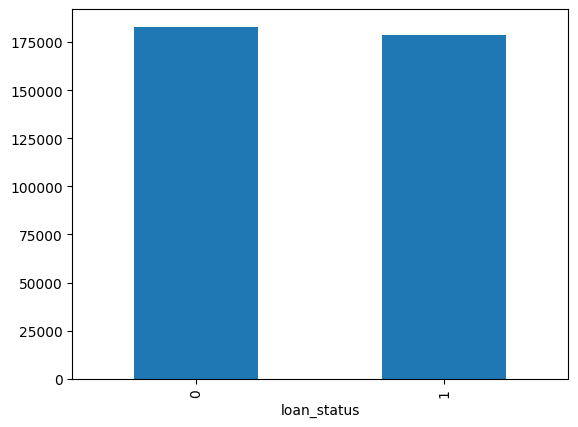

In [102]:
y_ada.value_counts().plot.bar()

As we can see for all the three methods the values counts is almost similar but the values that have been added are different based on the different techniques used to calculate them so we'll try to use all three sets of training data in our model and see which one performs the best.

# Model Building
We'll have logistic Regression as our baseline model and then we'll use XGBOOST Classifier, Random Forest Classifier models for increasing our performance.

In [103]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [104]:
X_smote = np.array(X_train).astype(np.float32)
y_smote = np.array(y_train).astype(np.float32)
X_bsmote = np.array(X_train).astype(np.float32)
y_bsmote = np.array(y_train).astype(np.float32)
X_ada = np.array(X_train).astype(np.float32)
y_ada = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Logistic Regression

**Trying with Simple SMOTE**

In [105]:
base = LogisticRegression(max_iter=500)
base.fit(X_smote, y_smote)

y_smote_pred = base.predict(X_smote)
y_test_pred = base.predict(X_test)

print_score(y_smote, y_smote_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.940874       0.883116  0.888771       0.911995       0.894527
recall         0.466288       0.992786  0.888771       0.729537       0.888771
f1-score       0.623550       0.934745  0.888771       0.779148       0.873266
support    43990.000000  178677.000000  0.888771  222667.000000  222667.000000
_______________________________________________
Confusion Matrix: 
 [[ 20512  23478]
 [  1289 177388]]

Test Result:
Accuracy Score: 88.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.942471      0.882458  0.888341       0.912464       0.894365
recall         0.465621      0.992965  0.888341       0.729293       0.888341
f1-score       0.623303      0.934456  0.888341     

**Trying with Baseline SMOTE**

In [106]:
base_b = LogisticRegression(max_iter=500)
base_b.fit(X_bsmote, y_bsmote)

y_bsmote_pred = base_b.predict(X_bsmote)
y_test_pred = base_b.predict(X_test)

print_score(y_bsmote, y_bsmote_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.940874       0.883116  0.888771       0.911995       0.894527
recall         0.466288       0.992786  0.888771       0.729537       0.888771
f1-score       0.623550       0.934745  0.888771       0.779148       0.873266
support    43990.000000  178677.000000  0.888771  222667.000000  222667.000000
_______________________________________________
Confusion Matrix: 
 [[ 20512  23478]
 [  1289 177388]]

Test Result:
Accuracy Score: 88.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.942471      0.882458  0.888341       0.912464       0.894365
recall         0.465621      0.992965  0.888341       0.729293       0.888341
f1-score       0.623303      0.934456  0.888341     

**Trying with ADASYNC**

In [107]:
base_ada = LogisticRegression(max_iter=500)
base_ada.fit(X_ada, y_ada)

y_ada_pred = base_ada.predict(X_ada)
y_test_pred = base_ada.predict(X_test)

print_score(y_ada, y_ada_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.940874       0.883116  0.888771       0.911995       0.894527
recall         0.466288       0.992786  0.888771       0.729537       0.888771
f1-score       0.623550       0.934745  0.888771       0.779148       0.873266
support    43990.000000  178677.000000  0.888771  222667.000000  222667.000000
_______________________________________________
Confusion Matrix: 
 [[ 20512  23478]
 [  1289 177388]]

Test Result:
Accuracy Score: 88.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.942471      0.882458  0.888341       0.912464       0.894365
recall         0.465621      0.992965  0.888341       0.729293       0.888341
f1-score       0.623303      0.934456  0.888341     

With all the three techniques the base model gives similar results on both train and test sets so we'll just go with simple SMOTE.

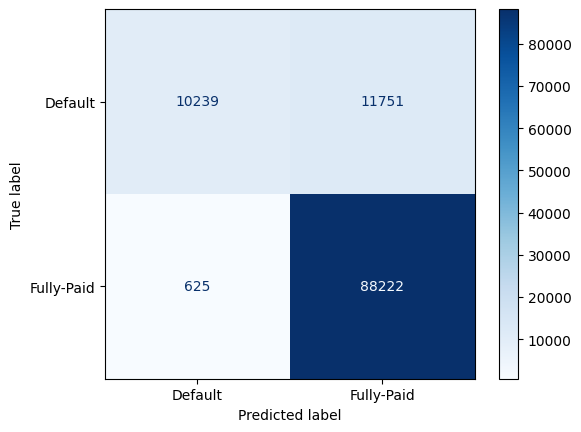

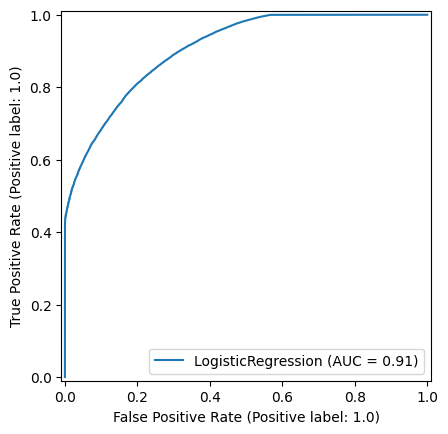

In [108]:
disp = ConfusionMatrixDisplay.from_estimator(
    base, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(base, X_test, y_test)

In [109]:
scores_dict= {
    'Logistic Regression':{
        'Train': roc_auc_score(y_smote, base.predict(X_smote)),
        'Test': roc_auc_score(y_test, base.predict(X_test)),
    },
}

In [110]:
scores_dict

{'Logistic Regression': {'Train': 0.7295368288383843,
  'Test': 0.7292930858298625}}

## Random Forest Classifier

In [111]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_smote, y_smote)

y_smote_pred_rfc = rfc.predict(X_smote)
y_test_pred_rfc = rfc.predict(X_test)

print_score(y_smote, y_smote_pred_rfc, train = True)
print_score(y_test, y_test_pred_rfc, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      1.000000       0.999994  0.999996       0.999997       0.999996
recall         0.999977       1.000000  0.999996       0.999989       0.999996
f1-score       0.999989       0.999997  0.999996       0.999993       0.999996
support    43990.000000  178677.000000  0.999996  222667.000000  222667.000000
_______________________________________________
Confusion Matrix: 
 [[ 43989      1]
 [     0 178677]]

Test Result:
Accuracy Score: 88.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.947438      0.880943  0.887312       0.914190       0.894136
recall         0.457390      0.993720  0.887312       0.725555       0.887312
f1-score       0.616942      0.933939  0.887312    

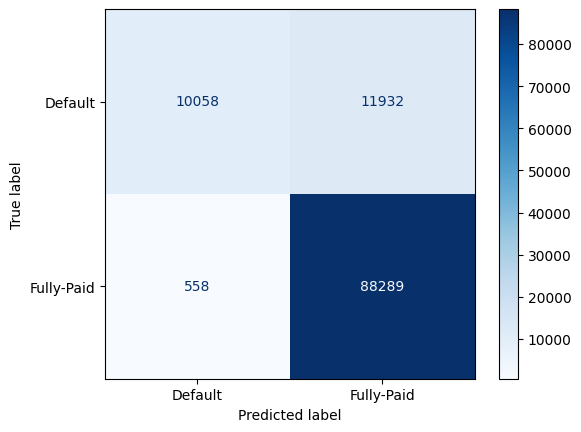

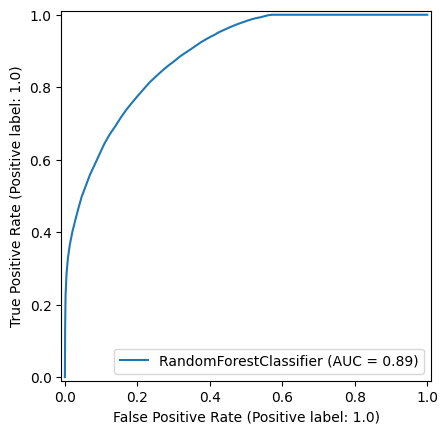

In [112]:
disp = ConfusionMatrixDisplay.from_estimator(
    rfc, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

In [113]:
scores_dict['Random Forest Classifier'] = {
        'Train': roc_auc_score(y_smote, rfc.predict(X_smote)),
        'Test': roc_auc_score(y_test, rfc.predict(X_test)),
    }

In [114]:
scores_dict

{'Logistic Regression': {'Train': 0.7295368288383843,
  'Test': 0.7292930858298625},
 'Random Forest Classifier': {'Train': 0.9999886337804047,
  'Test': 0.7255546314672823}}

## XGBoost Classifier

In [115]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_smote, y_smote)

y_smote_pred_xgb = xgb.predict(X_smote)
y_test_pred_xgb = xgb.predict(X_test)

print_score(y_smote, y_smote_pred_xgb, train = True)
print_score(y_test, y_test_pred_xgb, train = False)

Train Result:
Accuracy Score: 89.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.941030       0.890886  0.896217       0.915958       0.900793
recall         0.506411       0.992187  0.896217       0.749299       0.896217
f1-score       0.658469       0.938812  0.896217       0.798641       0.883427
support    43990.000000  178677.000000  0.896217  222667.000000  222667.000000
_______________________________________________
Confusion Matrix: 
 [[ 22277  21713]
 [  1396 177281]]

Test Result:
Accuracy Score: 88.76%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.907142      0.885293  0.887601       0.896217       0.889628
recall         0.482901      0.987765  0.887601       0.735333       0.887601
f1-score       0.630283      0.933726  0.887601     

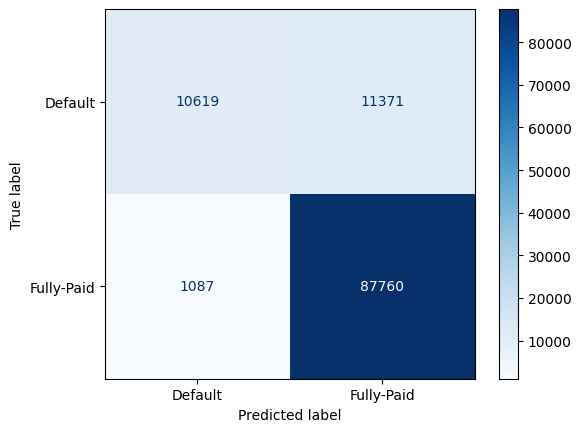

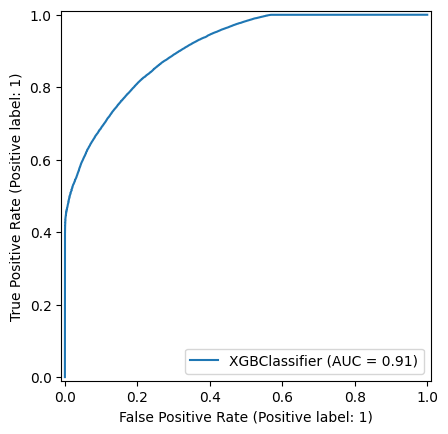

In [116]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb, X_test, y_test)

In [117]:
scores_dict['XGBoost Classifier'] = {
        'Train': roc_auc_score(y_smote, xgb.predict(X_smote)),
        'Test': roc_auc_score(y_test, xgb.predict(X_test)),
    }

In [118]:
scores_dict

{'Logistic Regression': {'Train': 0.7295368288383843,
  'Test': 0.7292930858298625},
 'Random Forest Classifier': {'Train': 0.9999886337804047,
  'Test': 0.7255546314672823},
 'XGBoost Classifier': {'Train': 0.7492987834430658,
  'Test': 0.7353334016329138}}

# Comparing Model Performances

In [119]:
ml_models = {
    'Random Forest': rfc, 
    'XGBoost': xgb, 
    'Logistic Regression': base
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.726
XGBOOST                        roc_auc_score: 0.735
LOGISTIC REGRESSION            roc_auc_score: 0.729


In [120]:
import hvplot.pandas

In [121]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)

We can say that the best performing model was XGBoost based on the ROC-AUC Score.